#1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

dataset = load_diabetes()
x_data = dataset.data
y_data = dataset.target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_train

array([[ 0.03081083, -0.04464164, -0.03315126, ..., -0.0763945 ,
        -0.03980959, -0.05492509],
       [ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736771, -0.0010777 ],
       [ 0.0090156 ,  0.05068012, -0.03961813, ...,  0.1081111 ,
         0.01556684, -0.04664087],
       ...,
       [ 0.02717829,  0.05068012,  0.01750591, ...,  0.07120998,
        -0.09643322, -0.05906719],
       [-0.08906294, -0.04464164, -0.01159501, ...,  0.03430886,
         0.02269202, -0.00936191],
       [-0.05273755,  0.05068012,  0.09834182, ...,  0.1081111 ,
         0.08449528,  0.04034337]])

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.w = None # weight
        self.b = None # bias
        self.learn = learning_rate # learning_rate
        self.losses = [] # losses for each epoch
        self.weight_history = [] # weight for each epoch
        self.bias_history = [] # bias for each epoch

    def forward(self, x):
        y_pred = np.sum(x * self.w) + self.b # hypothesis function
        return y_pred

    def loss(self, x, y):
        y_pred = self.forward(x)
        return (y_pred-y) ** 2 # cost function

    def gradient(self, x, y):
        y_pred = self.forward(x)
        w_grad = 2 * x * (y_pred-y) # weight gradient
        b_grad = 2 * (y_pred-y) # bias gradient

        return w_grad, b_grad

    def fit(self, x_data, y_data, epochs=1000):
        self.w = np.ones(x_data.shape[1]) # initialize weights to 1
        self.b = 0 # initialize bias to 0
        for epoch in range(epochs):
            l = 0 # initial value of loss
            w_grad = np.zeros(x_data.shape[1]) # array for gradient of weight
            b_grad = 0  # variable for gradient of bias

            for x,y in zip(x_data, y_data):
                # compute loss(cost) function in initial value
                l += self.loss(x, y)

                # compute gradient value in initial value
                w_i, b_i = self.gradient(x, y)
                w_grad += w_i
                b_grad += b_i

            self.w -= self.learn * (w_grad/len(y_data)) # update weight 
            self.b -= self.learn * (b_grad/len(y_data)) # update bias 

            print(f'epoch : {epoch+1} | loss : {l/len(y_data):.3f}')

            self.losses.append(l/len(y_data)) # save loss
            self.weight_history.append(self.w) # save weight
            self.bias_history.append(self.b) # save bias
            
model = LinearRegression()
model.fit(x_train, y_train)

epoch : 1 | loss : 29789.864
epoch : 2 | loss : 28841.585
epoch : 3 | loss : 27930.829
epoch : 4 | loss : 27056.111
epoch : 5 | loss : 26216.002
epoch : 6 | loss : 25409.133
epoch : 7 | loss : 24634.186
epoch : 8 | loss : 23889.899
epoch : 9 | loss : 23175.056
epoch : 10 | loss : 22488.493
epoch : 11 | loss : 21829.088
epoch : 12 | loss : 21195.767
epoch : 13 | loss : 20587.496
epoch : 14 | loss : 20003.284
epoch : 15 | loss : 19442.177
epoch : 16 | loss : 18903.262
epoch : 17 | loss : 18385.658
epoch : 18 | loss : 17888.523
epoch : 19 | loss : 17411.045
epoch : 20 | loss : 16952.446
epoch : 21 | loss : 16511.979
epoch : 22 | loss : 16088.925
epoch : 23 | loss : 15682.595
epoch : 24 | loss : 15292.327
epoch : 25 | loss : 14917.485
epoch : 26 | loss : 14557.457
epoch : 27 | loss : 14211.657
epoch : 28 | loss : 13879.522
epoch : 29 | loss : 13560.511
epoch : 30 | loss : 13254.103
epoch : 31 | loss : 12959.800
epoch : 32 | loss : 12677.123
epoch : 33 | loss : 12405.610
epoch : 34 | loss :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

sgd = SGDRegressor(max_iter=1000)
sgd.fit(x_train_std, y_train)
print(sgd.coef_, sgd.intercept_)

[ -1.21948907 -12.03452845  24.02148053  15.23863835  -4.47533114
  -4.76588969  -9.66895645   4.8123194   25.25023519   4.4268458 ] [152.22216897]


#2

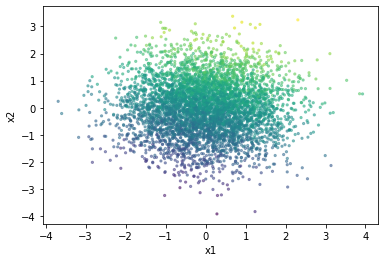

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
x, y, c = make_regression(n_samples=5000, n_features=2, bias=10, noise=10, coef=True, random_state=42)
plt.scatter(x[:,0], x[:,1], c=y, s=5, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_std, y_train)
print(lr.coef_, lr.intercept_)

[10.41082126 32.48296517] 10.058713095693466


#3

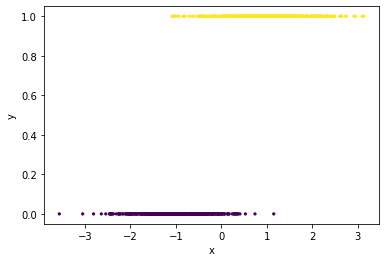

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
x, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)
plt.scatter(x, y, c=y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)